Chapter 15

# 割线
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码的核心是通过绘制一系列割线，观察函数 $f(x) = x^2$ 在一点附近的变化趋势，并计算各割线的斜率随增量 $\Delta X$ 的变化。割线的斜率逐渐逼近函数在该点的导数，展示出导数的几何含义。

首先，定义了割线函数 $f(x) = x^2$ 并选取一个固定点 $(x_0, y_0)$，其中 $x_0 = 1$ 且 $y_0 = f(x_0) = 1$。通过改变 $x_1 = x_0 + \Delta X$ 的值来生成多个割线，每条割线的斜率 $k$ 表示为：

$$
k = \frac{f(x_1) - f(x_0)}{x_1 - x_0} = \frac{y_1 - y_0}{x_1 - x_0}
$$

该公式实际是割线的斜率。随着 $\Delta X$ 的减小，割线的终点 $x_1$ 越来越接近 $x_0$，割线的斜率 $k$ 逐渐逼近函数在 $x_0$ 处的瞬时变化率（即切线的斜率），其极限为 $f'(x_0) = 2x_0 = 2$。

代码通过以下步骤实现：
1. **绘制函数曲线**：在图上绘制 $f(x) = x^2$ 的整体形状并标记点 $(x_0, y_0)$。
2. **生成割线**：逐步增加 $\Delta X$ 的值，从 $0.1$ 到 $1$，以观察割线的变化。对于每个 $\Delta X$，计算终点 $(x_1, y_1)$ 并绘制割线。
3. **绘制割线斜率图**：在第二个图中绘制 $\Delta X$ 与对应割线斜率 $k$ 的关系，展示斜率随 $\Delta X$ 的减小逐渐趋近于 $2$ 的过程。

通过这种可视化方法，代码揭示了割线斜率如何逐步逼近切线斜率的过程，形象地展现了导数的几何意义。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm  # 导入Colormaps用于颜色映射
from sympy import latex, lambdify  # 导入latex格式化和符号函数转换
from sympy.abc import x  # 导入符号变量x

In [2]:
## 定义绘制割线的函数

In [3]:
def plot_secant(x0, y0, x1, y1, color):
    # 计算割线的斜率k
    k = (y1 - y0) / (x1 - x0)
    x = np.linspace(-1, 4, 100)  # 定义x的范围
    secant_y_x = k * (x - x0) + y0  # 根据点斜式计算割线的y值
    plt.plot(x, secant_y_x, color=color, linewidth=0.25)  # 绘制割线

In [4]:
## 初始化变量
delta_Xs = np.linspace(0.1, 1, 10)  # 定义ΔX的数组，用于不同割线

In [5]:
f_x = x**2  # 定义函数f(x) = x^2
f_x

x**2

In [6]:
x_array = np.linspace(-1, 4, 100)  # 定义x的范围
f_x_fcn = lambdify(x, f_x)  # 将符号函数f(x)转换为数值函数
y_array = f_x_fcn(x_array)  # 计算每个x对应的y值

x0 = 1  # 定义割线起始点的x值
y0 = f_x_fcn(x0)  # 计算f(x0)

## 绘制函数曲线和割线

(-1.0, 4.0)

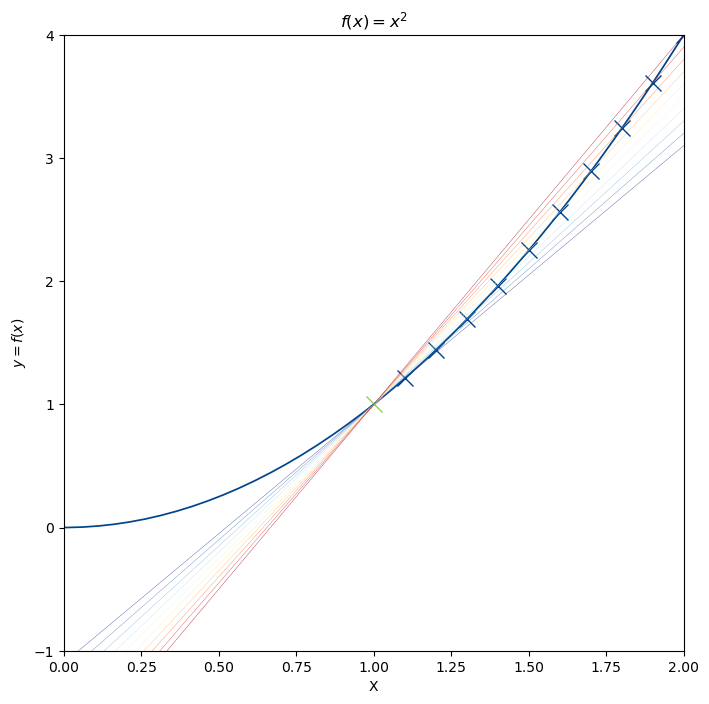

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))  # 创建绘图窗口

plt.plot(x_array, y_array, color='#00448A', linewidth=1.25)  # 绘制函数f(x)曲线
plt.plot(x0, y0, color='#92D050', marker='x', markersize=12)  # 标记点(x0, y0)

colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(delta_Xs)))  # 使用颜色映射为不同割线着色

for i in np.linspace(1, len(delta_Xs), len(delta_Xs)):
    x1 = x0 + delta_Xs[int(i) - 1]  # 计算割线终点的x坐标
    y1 = f_x_fcn(x1)  # 计算割线终点的y坐标
    plt.plot(x1, y1, color='#00448A', marker='x', markersize=12)  # 标记割线终点
    plot_secant(x0, y0, x1, y1, colors[int(i) - 1])  # 调用函数绘制割线

plt.xlabel('X')  # 设置x轴标签
plt.ylabel('$y = f(x)$')  # 设置y轴标签
ax.set_title('$f(x) = %s$' % latex(f_x))  # 设置标题显示函数表达式
ax.set_xlim(0, 2)  # 设置x轴范围
ax.set_ylim(-1, 4)  # 设置y轴范围